In [2]:
import pandas as pd
import numpy as np
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score

import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.neighbors as skl_nb

In [3]:
data = pd.read_csv('result.csv')

In [9]:
data = data.rename(columns={'customer': 'customer', 'merchant': 'merchant', 'predictive_score':'predicted_score'})
data.shape

(12604600, 3)

In [12]:
data.tail()

,customer,merchant,predicted_score
12604595,581658,1685038,-0.044694
12604596,559729,1741912,-0.056826
12604597,594817,1414695,-0.045460
12604598,597078,1414861,-0.094556
12604599,597078,2047947,-0.110023


In [6]:
data.to_csv('result_updated.csv',index = False)

In [7]:
data2 = pd.read_csv('result_updated.csv')

In [13]:
data2.tail()

,customer,merchant,predicted_score
12604595,581658,1685038,-0.044694
12604596,559729,1741912,-0.056826
12604597,594817,1414695,-0.045460
12604598,597078,1414861,-0.094556
12604599,597078,2047947,-0.110023


# Data Preprocessing

In [3]:
data = pd.read_csv('training.csv')
data.head()

,ind_recommended,activation,customer_digital_activity_04,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,NaN,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,...,49466.0,65923.0,0.000000,29.180,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,NaN,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,...,3638.0,7801.0,0.419355,28.465,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,NaN,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,...,3912.0,12868.0,0.836364,421.500,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,NaN,112.277391,NaN,NaN,NaN,NaN,NaN,16.0,...,28919.0,23553.0,0.952381,50.000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,NaN,448.427273,NaN,NaN,NaN,NaN,NaN,5.0,...,1086.0,308.0,0.754386,69.509,77.794164,15.000000,114.0,1.767939,210107,536004


In [4]:
data_clean = data.dropna(axis=1, thresh = data.shape[0]/2)
data_clean = data_clean.fillna(0)

In [5]:
sorted(list(data_clean.columns))

['activation',
 'customer',
 'customer_digital_activity_01',
 'customer_digital_activity_02',
 'customer_digital_activity_21',
 'customer_digital_activity_22',
 'customer_industry_spend_01',
 'customer_industry_spend_02',
 'customer_industry_spend_03',
 'customer_industry_spend_04',
 'customer_industry_spend_05',
 'customer_merchant_03',
 'customer_profile_01',
 'customer_profile_02',
 'customer_profile_03',
 'customer_profile_04',
 'customer_spend_01',
 'customer_spend_02',
 'customer_spend_03',
 'customer_spend_05',
 'customer_spend_06',
 'customer_spend_07',
 'distance_04',
 'distance_05',
 'ind_recommended',
 'merchant',
 'merchant_profile_01',
 'merchant_profile_02',
 'merchant_profile_03',
 'merchant_spend_01',
 'merchant_spend_02',
 'merchant_spend_03',
 'merchant_spend_04',
 'merchant_spend_05',
 'merchant_spend_06',
 'merchant_spend_07',
 'merchant_spend_08',
 'merchant_spend_09',
 'merchant_spend_10']

In [6]:
data_clean.head(n = 10)

,ind_recommended,activation,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
0,0,0,107.215862,26.686594,74.0,3682.75,138.0,111.0,14.0,133.0,...,49466.0,65923.0,0.000000,29.180000,58.434969,32.500000,86.0,15.856826,168972,152285
1,0,0,35.552000,50.928261,3.0,1171.35,23.0,17.0,2.0,8.0,...,3638.0,7801.0,0.419355,28.465000,5.392089,7.000000,125.0,6.998555,212404,39032
2,0,0,31.623103,48.837872,19.0,2295.38,47.0,42.0,11.0,62.0,...,3912.0,12868.0,0.836364,421.500000,33.780445,0.000000,180.0,1.753009,225178,7439
3,0,0,112.277391,0.000000,0.0,0.00,0.0,0.0,16.0,33.0,...,28919.0,23553.0,0.952381,50.000000,37.340085,28.666667,134.0,9.000063,183948,485069
4,1,0,448.427273,0.000000,0.0,0.00,0.0,0.0,5.0,8.0,...,1086.0,308.0,0.754386,69.509000,77.794164,15.000000,114.0,1.767939,210107,536004
5,0,0,81.858000,0.000000,0.0,0.00,0.0,0.0,9.0,72.0,...,20952.0,16692.0,0.212766,147.700000,73.403888,1.166667,80.0,1.366169,227362,419583
6,0,0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,...,26611.0,24708.0,0.581818,23.010000,0.000000,0.000000,193.0,18.914194,401342,343074
7,0,0,45.241765,17.014430,69.0,2535.15,149.0,109.0,7.0,133.0,...,26181.0,73439.0,0.243243,40.640000,98.155236,46.833333,142.0,0.063262,308043,266191
8,0,0,18.223538,29.103333,7.0,261.93,9.0,6.0,10.0,43.0,...,4691.0,13314.0,0.000000,350.555556,24.006210,7.333333,186.0,1.542463,174487,522438
9,0,0,1400.000000,1035.125000,1.0,2070.25,2.0,2.0,1.0,1.0,...,2894.0,1212.0,0.238095,563.000000,18.565891,0.000000,79.0,2.830609,414842,143402


{'whiskers': [<matplotlib.lines.Line2D at 0x169c834c0>,
 'caps': [<matplotlib.lines.Line2D at 0x169c83a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x169c83220>],
 'medians': [<matplotlib.lines.Line2D at 0x169c83f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x16c728220>],
 'means': []}

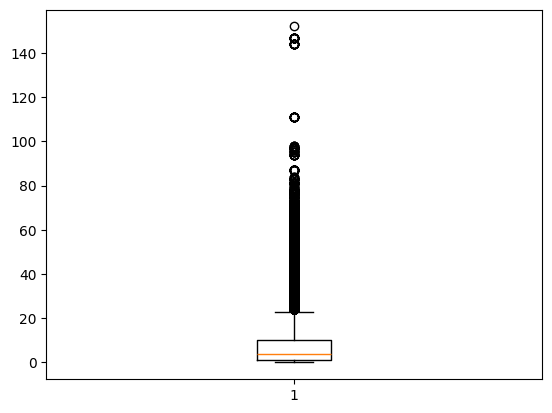

In [7]:
# plt.hist(data_clean['customer_spend_01'], color='lightgreen', ec='black', bins=15)
# plt.boxplot(data_clean['customer_spend_01'])
plt.boxplot(data_clean['customer_spend_02'])

In [8]:
columns = [ 'customer_digital_activity_01',
 'customer_digital_activity_02',
 'customer_digital_activity_21',
 'customer_digital_activity_22',
 'customer_industry_spend_01',
 'customer_industry_spend_02',
 'customer_industry_spend_03',
 'customer_industry_spend_04',
 'customer_industry_spend_05',
 'customer_merchant_03',
 'customer_profile_01',
 'customer_profile_02',
 'customer_profile_03',
 'customer_profile_04',
 'customer_spend_01',
 'customer_spend_02',
 'customer_spend_03',
 'customer_spend_05',
 'customer_spend_06',
 'customer_spend_07',
 'distance_04',
 'distance_05',
 'merchant_profile_02',
 'merchant_profile_03',
 'merchant_spend_01',
 'merchant_spend_02',
 'merchant_spend_03',
 'merchant_spend_04',
 'merchant_spend_05',
 'merchant_spend_06',
 'merchant_spend_07',
 'merchant_spend_08',
 'merchant_spend_09',
 'merchant_spend_10']
scaler = MinMaxScaler()
data_clean[columns] = scaler.fit_transform(data_clean[columns])

In [9]:
data_recommended = data_clean[data_clean['ind_recommended'] == 0]
data_recommended.head()

data_not_recommended = data_clean[data_clean['ind_recommended'] == 1]
data_not_recommended.head()

,ind_recommended,activation,customer_spend_01,customer_industry_spend_01,customer_industry_spend_02,customer_industry_spend_03,customer_industry_spend_04,customer_industry_spend_05,customer_spend_02,customer_spend_03,...,merchant_spend_09,merchant_profile_03,customer_digital_activity_01,merchant_spend_10,customer_profile_03,customer_digital_activity_02,customer_profile_04,distance_05,customer,merchant
4,1,0,0.001801,0.000000,0.000000,0.000000,0.000000,0.000000,0.032895,0.008351,...,0.010509,0.003123,0.754386,0.000106,0.777942,0.005442,0.149410,0.000695,210107,536004
13,1,0,0.000483,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.027140,...,0.059211,0.013707,0.368421,0.000596,0.177790,0.000786,0.589777,0.003807,394885,58470
21,1,0,0.006521,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.005219,...,0.243067,0.140260,0.350000,0.000047,0.442310,0.001995,0.382700,0.000391,94399,431332
22,1,0,0.000098,0.000617,0.004602,0.000074,0.000614,0.027778,0.046053,0.039666,...,0.223075,0.338886,0.222222,0.000099,0.998732,0.000846,0.338139,0.007323,120246,298378
37,1,0,0.000171,0.000145,0.002630,0.000020,0.000696,0.041667,0.098684,0.156576,...,0.000310,0.006742,0.025641,0.010713,0.579183,0.000181,0.342071,0.001329,113611,159357


# Recommended

In [10]:
data_rec_no_act = data_recommended[data_recommended['activation'] == 0]
data_rec_act = data_recommended[data_recommended['activation'] == 1]

data_rec_no_act_2 = data_rec_no_act.sample(n=60173, random_state=8)

data_rec = pd.concat([data_rec_act, data_rec_no_act_2])



In [11]:
x_recommended = data_rec.iloc[:, 2:]
y_recommended = data_rec['activation']

In [12]:
x_train_rec, x_test_rec, y_train_rec, y_test_rec = train_test_split(x_recommended, y_recommended, test_size=0.2, random_state=42)

In [134]:
model = LogisticRegression(max_iter=200)
model.fit(x_train_rec[columns], y_train_rec)


LogisticRegression(max_iter=200)

In [135]:
y_pred = model.predict(x_test_rec[columns])
y_pred_prob = model.predict_proba(x_test_rec[columns])[:, 1]

y_pred

array([0, 1, 0, ..., 1, 1, 1])

In [136]:
# Evaluate on the test set with the best hyperparameters
test_accuracy = accuracy_score(y_test_rec, y_pred)
precision_test = precision_score(y_test_rec, y_pred, average='weighted')
recall_test = recall_score(y_test_rec, y_pred, average='weighted')
print('Accuracy: %.3f' % test_accuracy)
print('Precision: %.3f' % precision_test)
print('Recall: %.3f' % recall_test)

Accuracy: 0.690
Precision: 0.694
Recall: 0.690


In [137]:
print('Confusion matrix:\n')
print(pd.crosstab(y_pred, y_test_rec), '\n')

Confusion matrix:

activation     0     1
row_0                 
0           9075  4561
1           2902  7532 



<function matplotlib.pyplot.show(close=None, block=None)>

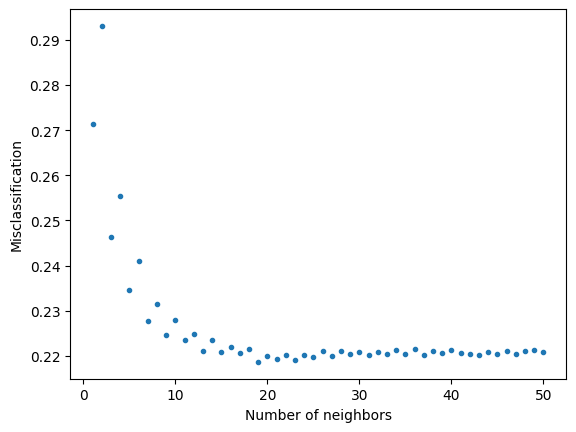

In [13]:
misclassification = []
for k in range(50): #Trying k = 1 to 50
    model = skl_nb.KNeighborsClassifier(n_neighbors = k+1)
    model.fit(x_train_rec[columns], y_train_rec)
    prediction = model.predict(x_test_rec[columns])
    misclassification.append(np.mean(prediction != y_test_rec))

K = np.linspace(1, 50, 50)
plt.plot(K, misclassification, '.')
plt.ylabel('Misclassification')
plt.xlabel('Number of neighbors')
plt.show

In [14]:
# Train model with k = 15
model_knn = skl_nb.KNeighborsClassifier(n_neighbors = 15)
model_knn.fit(x_train_rec[columns], y_train_rec)

# Prediction for model with k = 10
prediction_knn = model_knn.predict(x_test_rec[columns])

print('Confusion matrix:\n')
print(pd.crosstab(prediction_knn, y_test_rec), '\n')

Confusion matrix:

activation     0     1
row_0                 
0           9088  2426
1           2889  9667 



In [15]:
test_accuracy = accuracy_score(y_test_rec, prediction_knn)
precision_test = precision_score(y_test_rec, prediction_knn, average='weighted')
recall_test = recall_score(y_test_rec, prediction_knn, average='weighted')
print('Accuracy: %.3f' % test_accuracy)
print('Precision: %.3f' % precision_test)
print('Recall: %.3f' % recall_test)

Accuracy: 0.779
Precision: 0.780
Recall: 0.779


# Not Recommended

In [16]:
data_no_rec_no_act = data_not_recommended[data_not_recommended['activation'] == 0]
data_no_rec_act = data_not_recommended[data_not_recommended['activation'] == 1]

data_no_rec_no_act_2 = data_no_rec_no_act.sample(n=9843, random_state=8)

data_no_rec = pd.concat([data_no_rec_act, data_no_rec_no_act_2])

In [17]:
x_not_recommended = data_no_rec.iloc[:, 2:]
y_not_recommended = data_no_rec['activation']

In [18]:
x_train_no_rec, x_test_no_rec, y_train_no_rec, y_test_no_rec = train_test_split(x_not_recommended, y_not_recommended, test_size=0.4, random_state=42)

In [19]:
no_rec_model = LogisticRegression(max_iter=200)
no_rec_model.fit(x_train_no_rec[columns], y_train_no_rec)

LogisticRegression(max_iter=200)

In [35]:
y_no_rec_pred = no_rec_model.predict(x_test_no_rec[columns])
y_no_rec_pred_prob = no_rec_model.predict_proba(x_test_no_rec[columns])[:, 1]

In [36]:
# Evaluate on the test set with the best hyperparameters
no_rec_test_accuracy = accuracy_score(y_test_no_rec, y_no_rec_pred)
no_rec_precision_test = precision_score(y_test_no_rec, y_no_rec_pred, average='weighted')
no_rec_recall_test = recall_score(y_test_no_rec, y_no_rec_pred, average='weighted')
print('Accuracy: %.3f' % no_rec_test_accuracy)
print('Precision: %.3f' % no_rec_precision_test)
print('Recall: %.3f' % no_rec_recall_test)

Accuracy: 0.761
Precision: 0.762
Recall: 0.761


In [37]:
print('Confusion matrix:\n')
print(pd.crosstab(y_no_rec_pred, y_test_no_rec), '\n')

Confusion matrix:

activation     0     1
row_0                 
0           2889   853
1           1027  3106 



<function matplotlib.pyplot.show(close=None, block=None)>

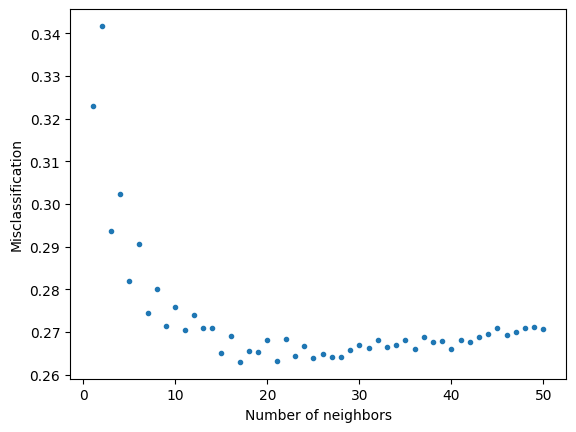

In [20]:
misclassification = []
for k in range(50): #Trying k = 1 to 50
    model = skl_nb.KNeighborsClassifier(n_neighbors = k+1)
    model.fit(x_train_no_rec[columns], y_train_no_rec)
    prediction = model.predict(x_test_no_rec[columns])
    misclassification.append(np.mean(prediction != y_test_no_rec))

K = np.linspace(1, 50, 50)
plt.plot(K, misclassification, '.')
plt.ylabel('Misclassification')
plt.xlabel('Number of neighbors')
plt.show

In [21]:
# Train model with k = 15
no_rec_model_knn = skl_nb.KNeighborsClassifier(n_neighbors = 15)
no_rec_model_knn.fit(x_train_no_rec[columns], y_train_no_rec)

# Prediction for model with k = 10
no_rec_prediction_knn = no_rec_model_knn.predict(x_test_no_rec[columns])

print('Confusion matrix:\n')
print(pd.crosstab(no_rec_prediction_knn, y_test_no_rec), '\n')

Confusion matrix:

activation     0     1
row_0                 
0           2731   903
1           1185  3056 



In [22]:
test_accuracy = accuracy_score(y_test_no_rec, no_rec_prediction_knn)
precision_test = precision_score(y_test_no_rec, no_rec_prediction_knn, average='weighted')
recall_test = recall_score(y_test_no_rec, no_rec_prediction_knn, average='weighted')
print('Accuracy: %.3f' % test_accuracy)
print('Precision: %.3f' % precision_test)
print('Recall: %.3f' % recall_test)

Accuracy: 0.735
Precision: 0.736
Recall: 0.735


# Predictive Score

In [23]:
sample = data_clean.sample(n=50000, random_state=555)
sample_x = data_clean.iloc[:, 2:]
sample_y = data_clean['activation']

m1 = model_knn.predict_proba(sample_x[columns])[:, 1]
m2 = no_rec_model_knn.predict_proba(sample_x[columns])[:, 1]

predictive_score = m1 - m2

sample['predictive_score'] = predictive_score

: 

: 

In [109]:
sample[['customer', 'merchant', 'predictive_score']]

,customer,merchant,predictive_score
875328,364039,523191,-0.017806
816515,377709,418110,0.016255
537768,419168,255146,0.034835
577057,206833,28384,0.021084
4367657,416775,432824,0.033044
...,...,...,...
6724573,122370,153392,0.039894
2724370,411194,531308,0.000989
11949964,421615,564224,-0.016297
11407154,196562,337434,0.024961


In [110]:
eval = sample[['customer', 'merchant', 'predictive_score', 'ind_recommended', 'activation']]

# Evaluation


In [111]:
### Scoring function for participating teams :
def incr_act_top10(input_df: pd.DataFrame,
                   pred_col: str,
                   cm_key='customer',
                   treated_col='ind_recommended',
                   actual_col='activation'):
    '''
    Function that returns the incremental activation score for the AMEX Singapore Hackathon 2024

    input_df : pandas Dataframe which has customer, ind_recommended, activation and pred_col
    pred_col : name of your prediction score variable
    cm_key : customer unique ID (do not change)
    treated_col : indicator variable whether a merchant was recommended
    actual_col : whether a CM had transacted at a given merchant (target variable)

    Returns - incremental activation
    '''
    
  #for correcting variable types
    input_df[[treated_col, actual_col, pred_col]] = input_df[[treated_col, actual_col, pred_col]].apply(pd.to_numeric, errors='coerce')
  
    input_df['rank_per_cm1'] = input_df.groupby(cm_key)[pred_col].rank(method='first', ascending=False)
    
    input_df = input_df.loc[input_df.rank_per_cm1 <= 10,:]
    
    agg_df = input_df.groupby(treated_col,as_index=False).agg({actual_col:'mean'})
    agg_df.columns = [treated_col,'avg_30d_act']
    
    print(agg_df)
    recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==1,'avg_30d_act'])
    not_recommended_avg_30d_act = float(agg_df.loc[agg_df[treated_col]==0,'avg_30d_act'])
    
  
    return (recommended_avg_30d_act-not_recommended_avg_30d_act)
  
# example usage
# incr_act_top_10(input_df = my_test_pd_df, pred_col = 'prediction_score')

In [113]:

incr_act_top10(input_df = eval, pred_col = 'predictive_score')

   ind_recommended  avg_30d_act
0                0     0.006420
1                1     0.007048


/var/folders/xx/r8ly5z917sl1cyljnn77j7z00000gn/T/ipykernel_69049/104884808.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[[treated_col, actual_col, pred_col]] = input_df[[treated_col, actual_col, pred_col]].apply(pd.to_numeric, errors='coerce')
/var/folders/xx/r8ly5z917sl1cyljnn77j7z00000gn/T/ipykernel_69049/104884808.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df['rank_per_cm1'] = input_df.groupby(cm_key)[pred_col].rank(method='first', ascending=False)
/var/folders/xx/r8ly5z91

0.0006279585082363112